In [1]:
## Problem1
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#input parameters
price = 75
cost = 50
salvage = 15
demand_mean = 500
demand_std = 75
order = 550

In [3]:
#base case model
demand = 450 #we assume this number for demand
if demand < order: qty_sold = demand
else: qty_sold = order
qty_left = order - qty_sold
sales_revenue = price * qty_sold
salvage_revenue = salvage * qty_left
total_cost = cost * order
profit = sales_revenue + salvage_revenue - total_cost
print(qty_sold, qty_left, sales_revenue, salvage_revenue, total_cost, profit)

450 100 33750 1500 27500 7750


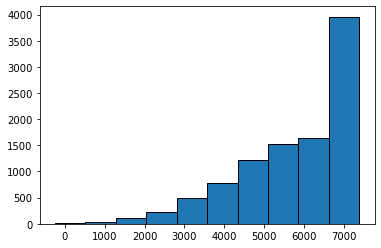

In [14]:
#simulation trials
rd.seed(101010)
trials = 10000
sample = list()
for i in range(trials):
    demand = rd.normalvariate(demand_mean, demand_std)
    if demand < order: qty_sold = demand 
    else: qty_sold = order
    qty_left = order - qty_sold
    sales_revenue = price * qty_sold
    salavage_revenue = salvage * qty_left
    total_cost = cost * order
    profit = sales_revenue + salvage_revenue - total_cost
    sample.append(profit)
    
(a,b,c) = plt.hist(sample, edgecolor='k')

In [15]:
mean = sum(sample)/len(sample)
print('Mean = $%5.2f' % (sum(sample)/len(sample)))

Mean = $5847.00


In [16]:
proportion = sum(1 for x in sample if x < 0.0)/len(sample)
print('There is a %5.2f%% chance of incurring a loss on the order.'% (100*proportion))

There is a  0.03% chance of incurring a loss on the order.


In [17]:
print(sample[0:10])

[7386.929190700043, 7386.929190700043, 4915.726197921041, 4101.562651145377, 7386.929190700043, 7386.929190700043, 5751.100873017233, 3157.4141023295533, 6231.695418680095, 4359.785598103787]


In [20]:
# part(d)
order_1st = list(range(300,801))
mean_profit_1st = list()
for order in order_1st:
    trials = 10000
    sample = list()
    for i in range(trials):
        demand = rd.normalvariate(demand_mean, demand_std)
        if demand < order: qty_sold = demand 
        else: qty_sold = order
        qty_left = order - qty_sold
        sales_revenue = price * qty_sold
        salavage_revenue = salvage * qty_left
        total_cost = cost * order
        profit = sales_revenue + salvage_revenue - total_cost
        sample.append(profit)
    mean_profit = sum(sample)/len(sample)
    mean_profit_1st.append(mean_profit)


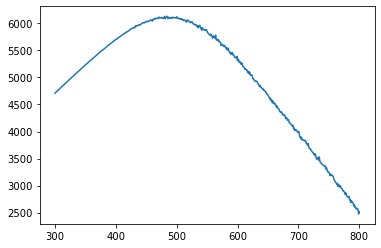

In [21]:
plt.plot(order_1st, mean_profit_1st)

In [22]:
print('The optimal order quantity is %d.' % (order_1st[mean_profit_1st.index(max(mean_profit_1st))]))
print('The expected profit is $%8.2f.'% (max(mean_profit_1st)))

The optimal order quantity is 484.
The expected profit is $ 6132.86.


In [11]:
##Question 2

#input parameters
price_min = 18.95
price_max = 26.95
price_mode = 24.95
cost_min = 12.00
cost_max = 15.00
intercept = 10000.00
slope = -250.00
rand_term_mean = 0.00
rand_term_std = 10.00
fixed_cost_mean = 30000
fixed_cost_std = 5000

In [12]:
#base case model
price = 24.95
cost = 13.50
rand_term = -10.00
quantity_sold = intercept + slope*price + rand_term
fixed_cost = 30000
profit = (price-cost)*quantity_sold - fixed_cost
print(quantity_sold, profit)

3752.5 12966.125


(array([  25.,  128.,  491., 1466., 2606., 2845., 1735.,  607.,   91.,
           6.]),
 array([-1.54982233e+04, -1.03225584e+04, -5.14689343e+03,  2.87714929e+01,
         5.20443642e+03,  1.03801013e+04,  1.55557663e+04,  2.07314312e+04,
         2.59070961e+04,  3.10827611e+04,  3.62584260e+04]),
 <a list of 10 Patch objects>)

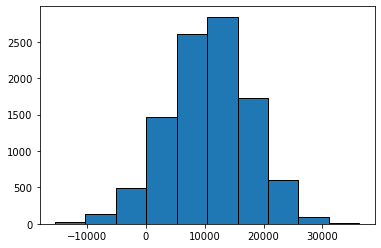

In [23]:
#simulation
trials = 10000
sample = list()
for i in range(trials):
    price = rd.triangular(price_min, price_max, price_mode)
    cost = rd.uniform(cost_min, cost_max)
    rand_term = rd.normalvariate(rand_term_mean, rand_term_std)
    quantity_sold = intercept + slope*price + rand_term
    fixed_cost = rd.normalvariate(fixed_cost_mean, fixed_cost_std)
    profit = (price - cost) * quantity_sold - fixed_cost
    sample.append(profit)
plt.hist(sample, edgecolor ="k")

In [8]:
print('The expected mean profit is $%8.2f' % (sum(sample)/len(sample)))
proportion = sum(1 for x in sample if x < 0.0)/len(sample)
print('The probability of incurring a lost is %5.2f%%' % (100*proportion))
print('The maximum lost is $%5.2f.' % (min(sample)))

The expected mean profit is $10728.00
The probability of incurring a lost is  6.30%
The maximum lost is $-13665.72.


In [ ]:
#2a Profit appears to be normally distributed